<a href="https://colab.research.google.com/github/Anastasiamay/Data_analyst/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и подгрузка датасета

In [1]:
!pip install -U kaleido -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default ="png"

In [3]:
!gdown --id 1cqpAqc3mKs5RAF5Cn01KEiqn35O4T6aA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cqpAqc3mKs5RAF5Cn01KEiqn35O4T6aA
To: /content/df_it_cours.xlsx
100% 30.8k/30.8k [00:00<00:00, 80.0MB/s]


# Структурирование данных

In [4]:
!pip install -q xlrd
it_cours = pd.read_excel('df_it_cours.xlsx')
it_cours

,name,company,price,time_period
0,Веб-вёрстка,Skillbox,35501,360
1,Профессия Fullstack-разработчик на Python,SkillFactory,143640,900
2,DevOps-инженер,Нетология,99000,960
3,Видеокурс Основы языка Python,GeekBrains,38500,60
4,"Курс ""React-разработчик""",Яндекс Практикум,51000,240
...,...,...,...,...
505,Профессия Machine Learning Engineer,Skillbox,185810,720
506,Профессия Аналитик в маркетинге,Skillbox,145226,720
507,Веб-аналитик с нуля до Junior 2.0,Skillbox,49245,360
508,Аналитика и аналитическое мышление для начинающих,Нетология,5600,90


# Анализ типов данных

In [5]:
it_cours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         510 non-null    object
 1   company      510 non-null    object
 2   price        510 non-null    int64 
 3   time_period  510 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 16.1+ KB


Типы данных в датасете it_cours:
* name (Название курса) - категориальный тип      
* company (Название организации) - категориальный тип        
* price (Стоимость в рублях) - количественный тип
* time_period (Продолжительность обучения в часах) - количественный тип
      


# Визуализация данных

Посмотрим количество курсов у каждой организации






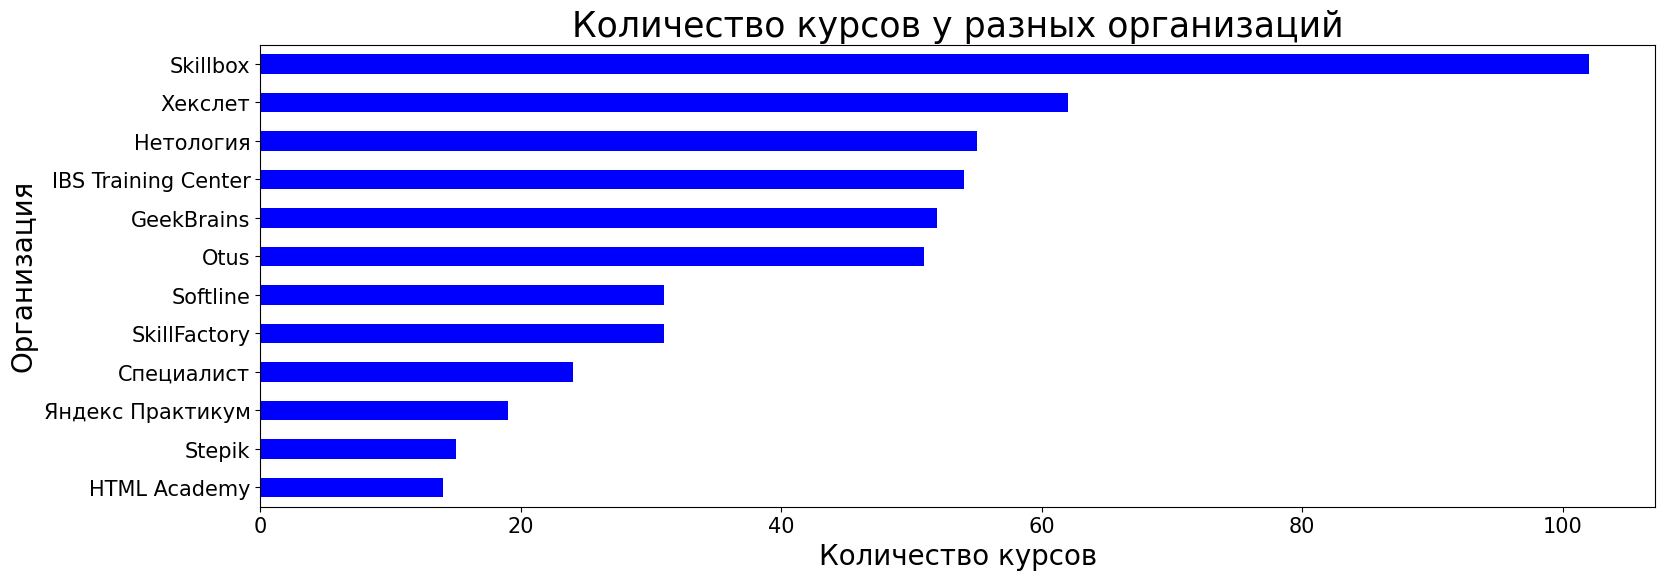

In [6]:
it_cours['company'].apply(pd.Series).stack().value_counts().sort_values().plot(kind='barh', figsize=(18,6), fontsize=15, color='blue')
plt.ylabel('Организация', fontsize=20)
plt.xlabel('Количество курсов', fontsize=20)
plt.title('Количество курсов у разных организаций', fontsize=25)
plt.show()

Рассмотрим стоимость курсов

Text(0.5, 1.0, 'Количество и стоимость it-курсов')

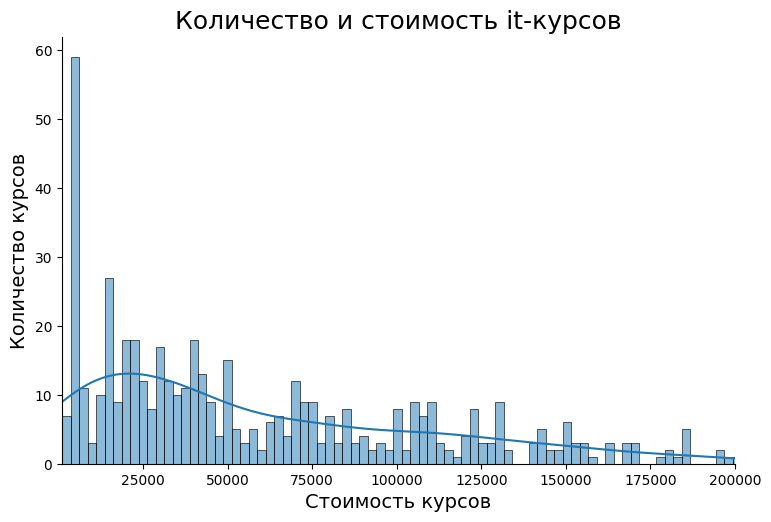

In [7]:
sns.displot(x='price',
            kde=True,
            aspect=1.5,
            bins = 100,
            data=it_cours)
plt.xlim(1000,200000)
plt.xlabel("Стоимость курсов",fontsize=14)
plt.ylabel("Количество курсов",fontsize=14)
plt.title('Количество и стоимость it-курсов', fontsize=18)

In [8]:
it_cours['price'].describe()

count       510.000000
mean      59898.000000
std       52043.537734
min        1090.000000
25%       18800.000000
50%       42900.000000
75%       92070.000000
max      252000.000000
Name: price, dtype: float64

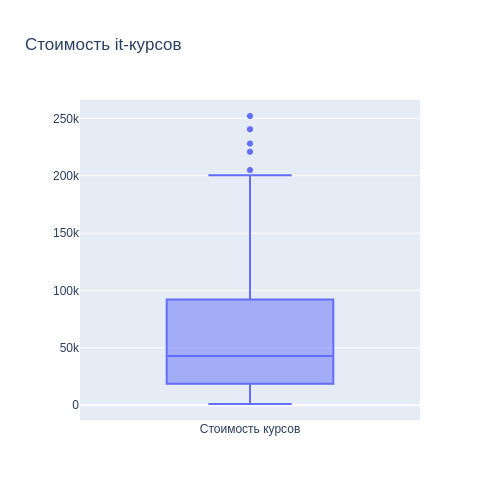

In [9]:
fig = go.Figure()
fig.add_trace(go.Box(y=it_cours['price'], name='Стоимость курсов'))
fig.update_layout(title="Стоимость it-курсов",height=500, width=500)
fig.show()

Посмотрим какой срок обучения предлагается на курсах

Text(0.5, 1.0, 'Количество и продолжительность it-курсов')

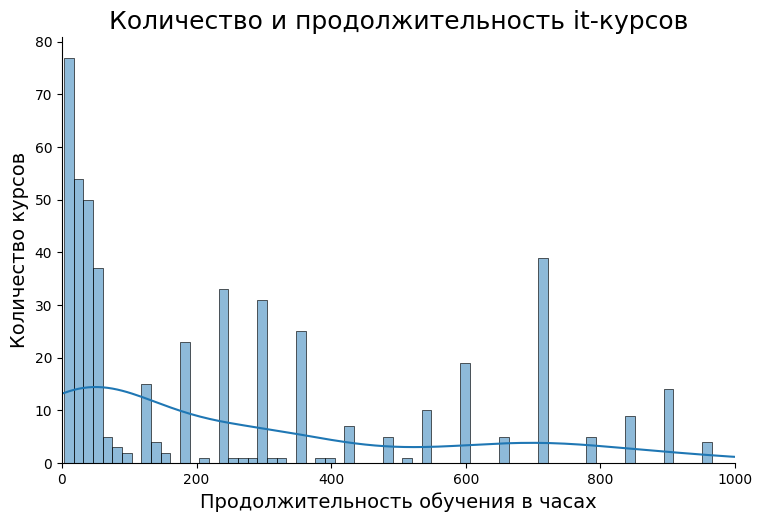

In [10]:
sns.displot(x='time_period',
            kde=True,
            aspect=1.5,
            bins = 100,
            data=it_cours)
plt.xlim(0,1000)
plt.xlabel("Продолжительность обучения в часах",fontsize=14)
plt.ylabel("Количество курсов",fontsize=14)
plt.title('Количество и продолжительность it-курсов', fontsize=18)

In [11]:
it_cours['time_period'].describe()

count     510.000000
mean      303.037255
std       350.114391
min         3.000000
25%        30.000000
50%       180.000000
75%       532.500000
max      1440.000000
Name: time_period, dtype: float64

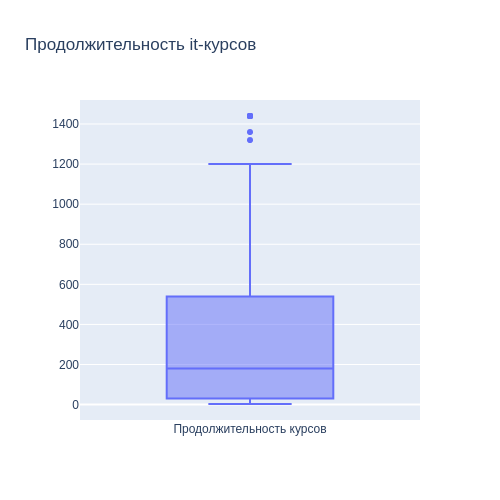

In [12]:
fig = go.Figure()
fig.add_trace(go.Box(y=it_cours['time_period'], name='Продолжительность курсов'))
fig.update_layout(title="Продолжительность it-курсов",height=500, width=500)
fig.show()

# Гипотеза о виде распределения

Для количественных показателей (период обучения, стоимость курса) проверим гипотезу о виде распределения.
Так как наша выборка составляет менее 5000 наблюдений , то воспользуемся критерием Шапиро-Уилка.
Предположим, что выборка по сроку обучения не принадлежит нормальной генеральной совокупности. 
Тогда Нулевая гипотеза будет звучать так: выборка по сроку обучения принадлежит нормальной генеральной совокупности, при этом уровень значимости полагаем равным 0,05.

In [13]:
stats.shapiro(it_cours['time_period'])

ShapiroResult(statistic=0.8038738369941711, pvalue=2.200407588256419e-24)

p-value (периода обучения) получилось значительно меньше уровня значимости (меньше 0,05). Таким образом отвергаем нулевую гипотезу в пользу альтернативы. Значит наблюдаемая выборка по периоду обучения не принадлежит нормальной генеральной совокупности.

Также предположим, что выборка по стоимости курсов не принадлежит нормальной генеральной совокупности. Тогда нулевая гипотеза будет звучать так: выборка по стоимости курсов принадлежит нормальной генеральной совокупности, при этом уровень значимости также равен 0,05.

In [14]:
stats.shapiro(it_cours['price'])

ShapiroResult(statistic=0.8931185007095337, pvalue=2.322884873858656e-18)

p-value (стоимости курсов) меньше 0,05, что также говорит об отвержении нулевой гипотезы. Принимаем альтернативу и делаем вывод о том, что выборка по стоимости курсов не принадлежит нормальной генеральной совокупности.

# Оценка связи между показателями

Проведем анализ связи количественных показателей с категориальными.
Посмотрим, есть ли взаимосвязь между организацией-составителем курса и продолжительностью их курсов, предварительно удалив выбросы. 
Определим нулевую гипотезу: статистически значимые отличия в группах (продолжительность обучения) отсутсвуют. В качестве критерия сравнения групп подходит критерий Краскала-Уолиса.


In [15]:
perc3_0 = np.percentile(it_cours[it_cours['company'] == 'Otus']['time_period'].dropna(), 3)
perc97_0 = np.percentile(it_cours[it_cours['company'] == 'Otus']['time_period'].dropna(), 97)
time_company = it_cours.drop(it_cours.loc[(it_cours['company'] == 'Otus') & (it_cours['time_period'] > perc3_0) & (it_cours['time_period'] < perc97_0)].index)
perc3_1 = np.percentile(it_cours[it_cours['company'] == 'Хекслет']['time_period'].dropna(), 3)
perc97_1 = np.percentile(it_cours[it_cours['company'] == 'Хекслет']['time_period'].dropna(), 97)
time_company0 = time_company.drop(time_company.loc[(time_company['company'] == 'Хекслет') & (time_company['time_period'] > perc3_1) & (time_company['time_period'] < perc97_1)].index)
perc3_2 = np.percentile(it_cours[it_cours['company'] == 'Яндекс Практикум']['time_period'].dropna(), 3)
perc97_2 = np.percentile(it_cours[it_cours['company'] == 'Яндекс Практикум']['time_period'].dropna(), 97)
time_company1 = time_company0.drop(time_company0.loc[(time_company0['company'] == 'Яндекс Практикум') & (time_company0['time_period'] > perc3_2) & (time_company0['time_period'] < perc97_2)].index)
#Softline и GeegBrains оставляем без изменений, т.к удаление выбросов у этих компаний приводит к искажению диаграмм размаха

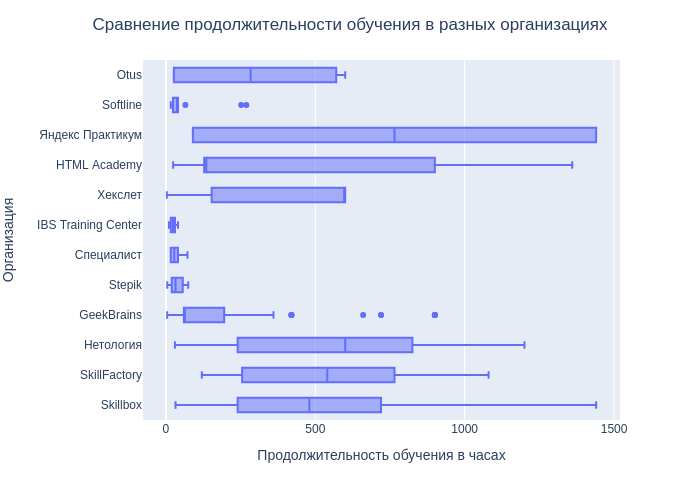

In [16]:
fig = go.Figure()
fig = px.box(time_company1, y='company', x='time_period')
fig.update_layout(title="Сравнение продолжительности обучения в разных организациях",
                  xaxis_title="Продолжительность обучения в часах",
                  yaxis_title="Организация",
                  title_x=0.5)
fig.show()

In [17]:
st1=np.array(time_company1[time_company1['company']=='Otus']['time_period'])
st2=np.array(time_company1[time_company1['company']=='Softline']['time_period'])
st3=np.array(time_company1[time_company1['company']=='HTML Academy']['time_period'])
st4=np.array(time_company1[time_company1['company']=='Хекслет']['time_period'])
st5=np.array(time_company1[time_company1['company']=='IBS Training Center']['time_period'])
st6=np.array(time_company1[time_company1['company']=='Специалист']['time_period'])
st7=np.array(time_company1[time_company1['company']=='Stepik']['time_period'])
st8=np.array(time_company1[time_company1['company']=='Яндекс Практикум']['time_period'])
st9=np.array(time_company1[time_company1['company']=='GeekBrains']['time_period'])
st10=np.array(time_company1[time_company1['company']=='Нетология']['time_period'])
st11=np.array(time_company1[time_company1['company']=='SkillFactory']['time_period'])
st12=np.array(time_company1[time_company1['company']=='Skillbox']['time_period'])

stats.mstats.kruskalwallis(st1,st2,st3,st4,st5,st6,st7,st8,st9,st10,st11,st12)

KruskalResult(statistic=255.34838334104248, pvalue=2.1177127517768463e-48)

В результате получили p-value меньше 0,05, значит нулевая гипотеза отвергается. Приходим к выводу, что продолжительность обучения зависит от организации-составителя курса. 


Аналогично выявим, есть ли взаимосвязь между организацией-составителем курса и стоимостью их курсов. 
Нулевая гипотеза: статистически значимые отличия в группах (стоимость обучения) отсутсвуют. В качестве критерия сравнения групп также используем критерий Краскала-Уолиса.

In [18]:
perc3_3 = np.percentile(it_cours[it_cours['company'] == 'Softline']['price'].dropna(), 3)
perc97_3 = np.percentile(it_cours[it_cours['company'] == 'Softline']['price'].dropna(), 97)
price_company = it_cours.drop(it_cours.loc[(it_cours['company'] == 'Softline') & (it_cours['price'] > perc3_3) & (it_cours['price'] < perc97_3)].index)
perc3_4 = np.percentile(it_cours[it_cours['company'] == 'Специалист']['price'].dropna(), 3)
perc97_4 = np.percentile(it_cours[it_cours['company'] == 'Специалист']['price'].dropna(), 97)
price_company1 = price_company.drop(price_company.loc[(price_company['company'] == 'Специалист') & (price_company['price'] > perc3_4) & (price_company['price'] < perc97_4)].index)
perc3_5 = np.percentile(it_cours[it_cours['company'] == 'HTML Academy']['price'].dropna(), 3)
perc97_5 = np.percentile(it_cours[it_cours['company'] == 'HTML Academy']['price'].dropna(), 97)
price_company2 = price_company1.drop(price_company1.loc[(price_company1['company'] == 'HTML Academy') & (price_company1['price'] > perc3_5) & (price_company1['price'] < perc97_5)].index)
perc3_6 = np.percentile(it_cours[it_cours['company'] == 'Яндекс Практикум']['price'].dropna(), 3)
perc97_6 = np.percentile(it_cours[it_cours['company'] == 'Яндекс Практикум']['price'].dropna(), 97)
price_company3 = price_company2.drop(price_company2.loc[(price_company2['company'] == 'Яндекс Практикум') & (price_company2['price'] > perc3_6) & (price_company2['price'] < perc97_6)].index)
perc3_7 = np.percentile(it_cours[it_cours['company'] == 'GeekBrains']['price'].dropna(), 3)
perc97_7 = np.percentile(it_cours[it_cours['company'] == 'GeekBrains']['price'].dropna(), 97)
price_company4 = price_company3.drop(price_company3.loc[(price_company3['company'] == 'GeekBrains') & (price_company3['price'] > perc3_7) & (price_company3['price'] < perc97_7)].index)
#Хекслет и Otus оставляем без изменений, удаление выбросов у этих компаний также приведет к искажению диаграмм размаха

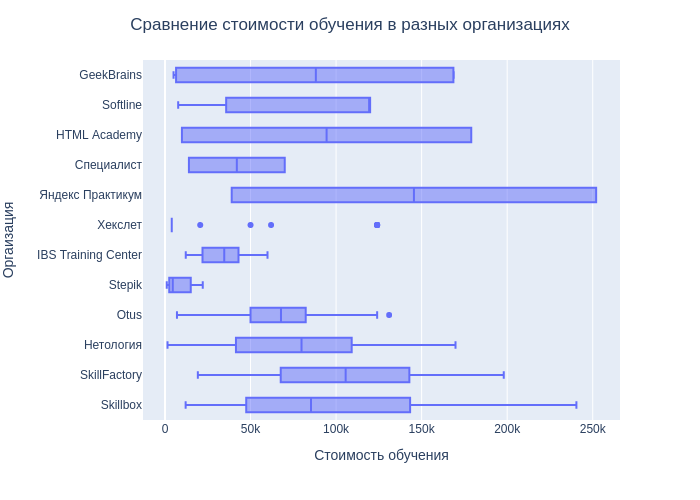

In [19]:
fig = go.Figure()
fig = px.box(price_company4, y='company', x='price')
fig.update_layout(title="Сравнение стоимости обучения в разных организациях",
                  xaxis_title="Стоимость обучения",
                  yaxis_title="Оргаизация",
                  title_x=0.5)
fig.show()

In [20]:
st_1=np.array(price_company4[price_company4['company']=='Otus']['price'])
st_2=np.array(price_company4[price_company4['company']=='Softline']['price'])
st_3=np.array(price_company4[price_company4['company']=='HTML Academy']['price'])
st_4=np.array(price_company4[price_company4['company']=='Хекслет']['price'])
st_5=np.array(price_company4[price_company4['company']=='IBS Training Center']['price'])
st_6=np.array(price_company4[price_company4['company']=='Специалист']['price'])
st_7=np.array(price_company4[price_company4['company']=='Stepik']['price'])
st_8=np.array(price_company4[price_company4['company']=='Яндекс Практикум']['price'])
st_9=np.array(price_company4[price_company4['company']=='GeekBrains']['price'])
st_10=np.array(price_company4[price_company4['company']=='Нетология']['price'])
st_11=np.array(price_company4[price_company4['company']=='SkillFactory']['price'])
st_12=np.array(price_company4[price_company4['company']=='Skillbox']['price'])

stats.mstats.kruskalwallis(st_1,st_2,st_3,st_4,st_5,st_6,st_7,st_8,st_9,st_10,st_11,st_12)

KruskalResult(statistic=187.76019736349832, pvalue=2.5539302043942024e-34)

p-value меньше 0,05, значит нулевая гипотеза отвергается. Таким образом, стоимость обучения зависит от организации-составителя курса. 

Проверим, отвергается ли нулевая гипотеза, если не удалять выбросы.

In [21]:
st1=np.array(it_cours[it_cours['company']=='Otus']['time_period'])
st2=np.array(it_cours[it_cours['company']=='Softline']['time_period'])
st3=np.array(it_cours[it_cours['company']=='HTML Academy']['time_period'])
st4=np.array(it_cours[it_cours['company']=='Хекслет']['time_period'])
st5=np.array(it_cours[it_cours['company']=='IBS Training Center']['time_period'])
st6=np.array(it_cours[it_cours['company']=='Специалист']['time_period'])
st7=np.array(it_cours[it_cours['company']=='Stepik']['time_period'])
st8=np.array(it_cours[it_cours['company']=='Яндекс Практикум']['time_period'])
st9=np.array(it_cours[it_cours['company']=='GeekBrains']['time_period'])
st10=np.array(it_cours[it_cours['company']=='Нетология']['time_period'])
st11=np.array(it_cours[it_cours['company']=='SkillFactory']['time_period'])
st12=np.array(it_cours[it_cours['company']=='Skillbox']['time_period'])

stats.mstats.kruskalwallis(st1,st2,st3,st4,st5,st6,st7,st8,st9,st10,st11,st12)

KruskalResult(statistic=338.61849182337755, pvalue=6.191032401734034e-66)

In [22]:
st_1=np.array(it_cours[it_cours['company']=='Otus']['price'])
st_2=np.array(it_cours[it_cours['company']=='Softline']['price'])
st_3=np.array(it_cours[it_cours['company']=='HTML Academy']['price'])
st_4=np.array(it_cours[it_cours['company']=='Хекслет']['price'])
st_5=np.array(it_cours[it_cours['company']=='IBS Training Center']['price'])
st_6=np.array(it_cours[it_cours['company']=='Специалист']['price'])
st_7=np.array(it_cours[it_cours['company']=='Stepik']['price'])
st_8=np.array(it_cours[it_cours['company']=='Яндекс Практикум']['price'])
st_9=np.array(it_cours[it_cours['company']=='GeekBrains']['price'])
st_10=np.array(it_cours[it_cours['company']=='Нетология']['price'])
st_11=np.array(it_cours[it_cours['company']=='SkillFactory']['price'])
st_12=np.array(it_cours[it_cours['company']=='Skillbox']['price'])

stats.mstats.kruskalwallis(st_1,st_2,st_3,st_4,st_5,st_6,st_7,st_8,st_9,st_10,st_11,st_12)

KruskalResult(statistic=251.34562441123356, pvalue=1.4602447450386807e-47)

Убедились, что выбросы не повлияли на результат и p-value также меньше 0,05, подтверждается гипотеза о наличии связи между стоимостью обучения и организацией-составителем, и между продолжительностью обучения и организацией-составителем.

# Корреляционный анализ Пирсона

Проверим гипотезу о зависимости стоимости обучения от продолжительности обучения. Нулевая гипотеза: стоимость обучения не завсисит от продолжительности обучения; уровень значимости полагаем равным 0,05.
Для визуализации данных построим диаграмму рассеяния.




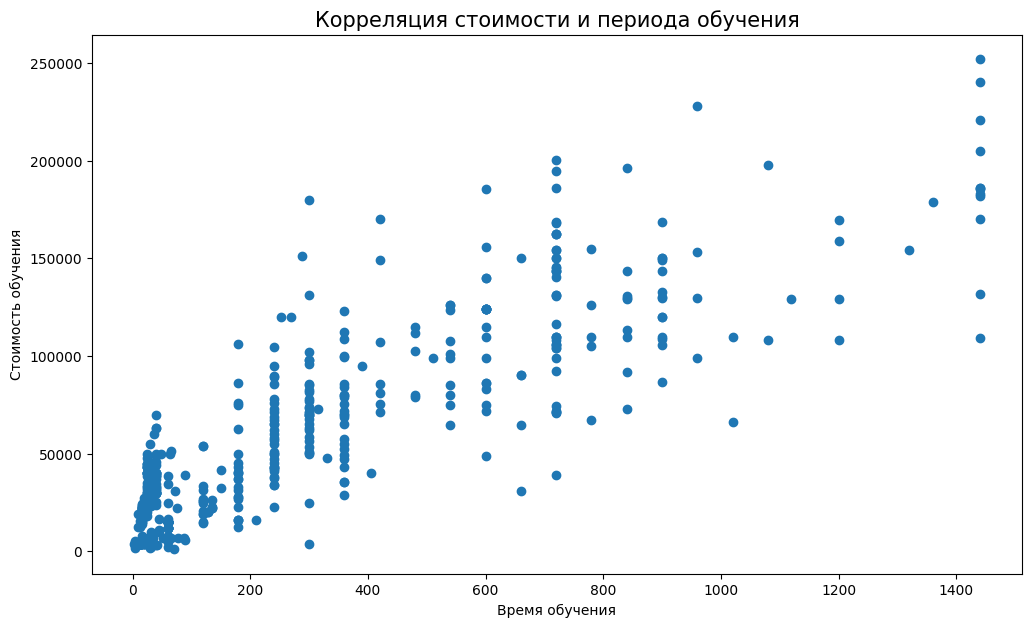

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(x=it_cours['time_period'], y=it_cours['price'])
plt.title("Корреляция стоимости и периода обучения",fontsize=15)
plt.ylabel("Стоимость обучения")
plt.xlabel("Время обучения")
plt.show()

Наблюдается монотонная связь. Проведем коррелляционный анализ количественных данных. Так как исследуем корреляцию двух количественных переменных, расчитаем парный коэффициент корреляции Пирсона и p-value. Этот коэффициент измерит величину линейной связи (корреляцию) между двумя переменными.

In [24]:
scipy.stats.pearsonr(it_cours['price'], it_cours['time_period'])

PearsonRResult(statistic=0.8630863580714785, pvalue=8.111387360204056e-153)

Расчет корреляции Пирсона показал, что коэффициент связи продолжительности обучения и стоимости курса достаточно высокий. А значение p-value меньше 0,05, следовательно, связь  между продолжительностью и стоимостью обучения является статистически значимой. 



Построим парную модель регрессии стоимости курсов от продолжительности обучения.

Text(37.722222222222214, 0.5, 'Стоимость')

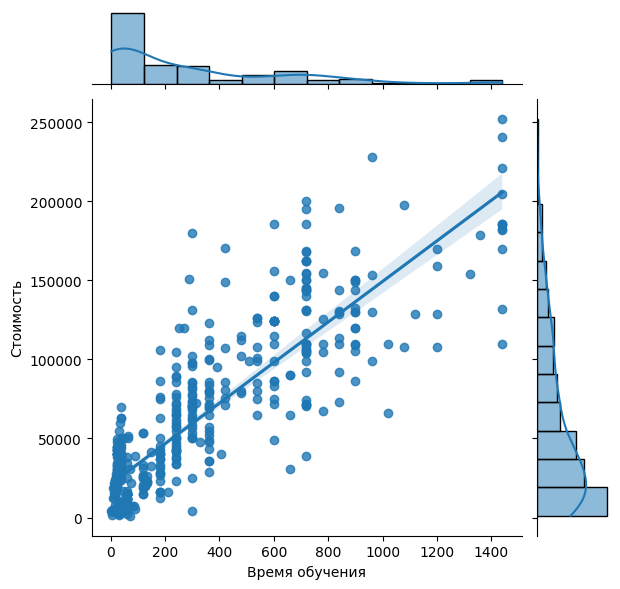

In [25]:
h = sns.jointplot(x = 'time_period', y = 'price', data=it_cours, kind="reg")
h.ax_joint.set_xlabel('Время обучения')
h.ax_joint.set_ylabel('Стоимость')

В целом, даную модель можно назвать линейной. Проведем оценку регрессионной модели, а также проведем расчет парной регрессии методом наименьших квадратов (OLS).

In [26]:
LR = lm.LinearRegression()
model1 = LR.fit(it_cours[['time_period']],it_cours[['price']])
model1.intercept_, model1.coef_

(array([21019.71281562]), array([[128.29540446]]))

In [27]:
r_squared = model1.score(it_cours[['time_period']],it_cours[['price']])
r_squared

0.7449180614890881

In [28]:
results1 = smf.ols('price ~ time_period', it_cours).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1484.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          8.11e-153
Time:                        13:19:43   Log-Likelihood:                -5913.3
No. Observations:                 510   AIC:                         1.183e+04
Df Residuals:                     508   BIC:                         1.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.102e+04   1541.507     13.636      0.000     1.8e+04     2.4e+04
time_period   128.2954      3.331     38.516      0.000     121.751     134.839
==============================================================================
Omnibus:                       60.423   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.599
Skew:                           0.638   Prob(JB):                     8.01e-31
Kurtosis:                       5.213   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Результаты оценки построеной регрессионной модели:
* коэффициент детерминации (R-squared) = 0,74. Это составляет 74% и означает, что детерминация достаточно высокая;  
* p-value меньше 0,05, это говорит о том, что построенная модель статистически значима; отвергли нулевую гипотезу, значит стоимость обучения завсисит от продолжительности обучения;
* среднее ожидаемое значение стоимости курсов: количество часов обучения умножается на коэффициент (128,3) и прибавляется значение свободного члена (21020). p-value для этих параметров меньше 0,05, что говорит о значимости этих параметров. Также для этих параметров расчитаны доверительные интервалы;
* коэффициенты асимметрии (skew) и эксцесса (kurtosis) в данном исследовании не применялись, так как гипотезу о виде распределения проверяли с помощью критерия Шапиро-Уилка; как и сама выборка, остатки (Prob(JB)) не подчиняются гаусовскому закону распределения.

На диаграмме рассеяния отобразим предсказанные медианные значения стоимости обучения.

In [29]:
model = smf.quantreg('price ~ time_period', it_cours).fit(q=0.5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.5201
Model:                       QuantReg   Bandwidth:                   1.451e+04
Method:                 Least Squares   Sparsity:                    6.515e+04
Date:                Mon, 12 Jun 2023   No. Observations:                  510
Time:                        13:19:43   Df Residuals:                      508
                                        Df Model:                            1
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.738e+04   1908.561      9.105      0.000    1.36e+04    2.11e+04
time_period   128.3633      4.124     31.125      0.000     120.261     136.466
===============================================================================
"""

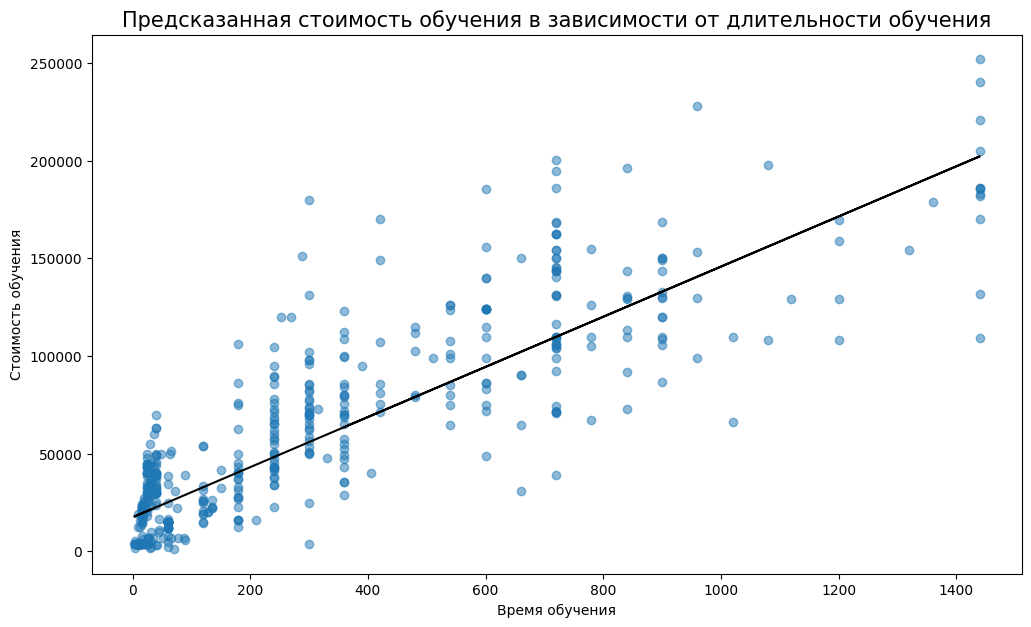

In [30]:
fig, ax = plt.subplots(figsize=(12, 7))

y_line = lambda a, b: a + b * it_cours['time_period']
y = y_line(model.params['Intercept'], model.params['time_period'])
 
ax.plot(it_cours['time_period'], y, color='black')
ax.scatter(it_cours['time_period'], it_cours['price'], alpha=0.5)
ax.set_xlabel('Время обучения')
ax.set_title('Предсказанная стоимость обучения в зависимости от длительности обучения',fontsize=15)
ax.set_ylabel('Стоимость обучения')
fig.show()

Итоговые выводы:
* используя критерий Шапиро-Уилка подтвердили гипотезу о том, что наблюдаемые выборки по периоду обучения и стоимости обучения не принадлежат нормальной генеральной совокупности;
* используя критерий Краскала-Уолиса подтвердили гипотезу о зависимости стоимости курсов от организации-составителя;
* используя критерий Краскала-Уолиса подтвердили гипотезу о зависимости продолжительности обучения на курсах от организации-составителя;
* используя коэффициент корреляции Пирсона подтвердили гипотезу о зависимости стоимости курсов от продолжительности обучения;
* с помощью расчета парной регрессии методом наименьших квадратов, предсказали стоимость курсов в зависимости от продолжительности обучения;
* коэффициент детерминации составил 74%, что говорит о достаточно высокой точности определения коэффициента и значения свободного члена для предсказания стоимости курса.

